In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pymks
from pymks.datasets.cahn_hilliard_simulation import CahnHilliardSimulation
from pymks.tools import draw_concentrations
from pymks.tools import draw_coeff
from pymks.bases import LegendreBasis
from pymks import MKSLocalizationModel

/home/apaar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/apaar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
import time

In [4]:
def ch_test(length=51, time_steps = 50, seed = 99, dt =1e-1, gamma = 1., n_samples=1):
    np.random.seed(seed)
    size=(length, length)
    phi0 = np.random.normal(0, 1e-1, ((n_samples,) + size))
    phi_sim = phi0.copy()
    ch_sim = CahnHilliardSimulation(dt=dt)
    for steps in range(time_steps):
        ch_sim.run(phi_sim)
        phi_sim = ch_sim.response
    return phi0, phi_sim

In [5]:
def error(X, Y):
    n = X.shape[0]*X.shape[1]
    return (np.sum((X-Y)**2))

In [16]:
time_steps = 50 # Simulation time
seed = 101 # seed for random no, generator for geenrating the initial microstructure
dt = 1e-1 #simulation timestep
gamma=1. #gamma parameter value
training_samples = 10 # no. of training samples to be generated

In [17]:
training_times = np.zeros((10,1))

In [18]:
leg_basis = LegendreBasis(4, [-1, 1])
leg_model = MKSLocalizationModel(basis=leg_basis)

In [20]:
%%time
for i in range(10):
    length = (i+1)*100 # size of domain
    X, y = ch_test(length, time_steps, seed, dt, gamma, training_samples)
    start = time.clock()
    leg_model.fit(X, y)
    stop = time.clock()
    training_times[i] = stop-start
    print(i, training_times[i,0])

0 0.770232
1 3.050946
2 6.771979
3 13.591359
4 21.215688
5 27.878867
6 38.599956
7 49.189418
8 62.808326
9 76.960778
CPU times: user 14min 11s, sys: 2min 11s, total: 16min 22s
Wall time: 16min 23s


In [25]:
samples = (np.reshape(np.arange(10),(10,1)) + 1)*100

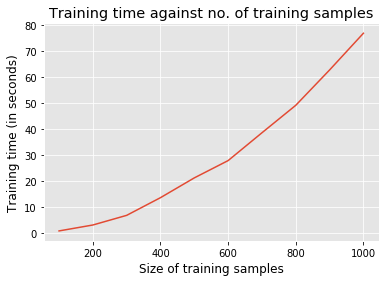

In [27]:
plt.plot(samples, training_times)
plt.title("Training time against no. of training samples")
plt.ylabel("Training time (in seconds)")
plt.xlabel("Size of training samples")
plt.show()

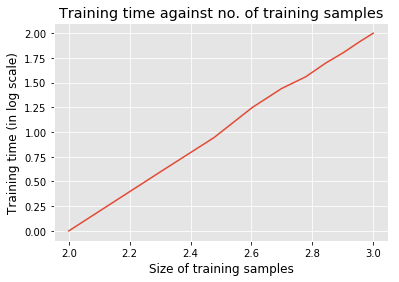

In [30]:
min_time= np.min(training_times)
time = training_times/min_time
log_time = np.log10(time)

plt.plot(np.log10(samples), log_time)
plt.title("Training time against no. of training samples")
plt.ylabel("Training time (in log scale)")
plt.xlabel("Size of training samples")
plt.show()